In [162]:
import matplotlib.pylab as plt
import numpy as np
from astropy import units as u
from astropy.io import fits
import aplpy
import matplotlib.patheffects as pe
from astropy.wcs import WCS
import colorcet as cc


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
def fix_aplpy_fits(aplpy_obj, dropaxis=2):
    """This removes the degenerated dimensions in APLpy 2.X...
    The input must be the object returned by aplpy.FITSFigure().
    `dropaxis` is the index where to start dropping the axis (by default it assumes the 3rd,4th place).
    """
    temp_wcs = aplpy_obj._wcs.dropaxis(dropaxis)
    temp_wcs = temp_wcs.dropaxis(dropaxis)
    aplpy_obj._wcs = temp_wcs

In [134]:
def Fig1( fig, fontcolor='black', 
         show_contour=True, contour_data=[], contour_levs='',
         plot_xlabel=True, plot_ylabel=False, 
         plot_cbar=False, cbar_label='(Jy beam$^{-1}$)',
         plot_label=True, label=' ', label_coord=[0.67,0.9],
         plot_beam=True, plot_grid=False, recenter_data=True):
    
    fig.set_nan_color('0.95')
    
    if plot_beam:
        fig.add_beam()
        fig.beam.set(facecolor='white', edgecolor='black', hatch='////////')
        
    fig.axis_labels.set_font(size=6)
    fig.axis_labels.set_xtext('RA')
    fig.tick_labels.set_yformat('d.ddd')
    fig.axis_labels.set_ytext('DEC')
    fig.tick_labels.set_xformat('d.ddd')
    fig.axis_labels.set_ypad(pad=-1.5)
    
    fig.ticks.set_color('white')
    fig.ticks.set_tick_direction('in')
    fig.tick_labels.set_font(size=6)
    #fig.ticks.set_minor_frequency(2)
    fig.ticks.set_yspacing(0.002)  # degrees
    fig.ticks.set_xspacing(0.01)  # degrees
    
    if not plot_xlabel:
        fig.axis_labels.hide_x()
        fig.tick_labels.hide_x()
        
    if not plot_ylabel:
        fig.axis_labels.hide_y()
        fig.tick_labels.hide_y()
        
    if plot_cbar:
        fig.add_colorbar()
        fig.colorbar.set_location('top')
        fig.colorbar.set_width(0.05)
        fig.colorbar.set_pad(0.5)
        fig.colorbar.set_axis_label_text(cbar_label)
        
    if show_contour:
        c_levs = contour_levs
        fig.show_contour(contour_data, colors='white', linewidths=1.5, levels=c_levs)
        fig.show_contour(contour_data, colors='black', linewidths=0.75, levels=c_levs)
    
    if plot_label:
        fig.add_label(label_coord[0], label_coord[1], label, relative=True, color=fontcolor, size=6)
        
    if plot_grid:
        fig.add_grid()
        fig.grid.set_color('white')
        fig.grid.set_alpha(0.1)
        fig.grid.set_linestyle(':')  
        
    if recenter_data:
        # got the coordinates of the center from CASAviewer
        fig.recenter(347.432, 67.3942, radius=0.006)# width=0.008, height=0.008)  
    

# Figure 1

In [80]:
### continuum
cont_original = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/data/DraChi.CONT.fits')
cont = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/data/DraChi.CONT_modified_header.fits')

## delete header keywords of the third and fourth dimension
cont[0].header['NAXIS'] = 2
del cont[0].header['NAXIS3']
del cont[0].header['NAXIS4']
del cont[0].header['CTYPE3']
del cont[0].header['CRVAL3']
del cont[0].header['CDELT3']
del cont[0].header['CRPIX3']
del cont[0].header['CUNIT3']
del cont[0].header['CTYPE4']
del cont[0].header['CRVAL4']
del cont[0].header['CDELT4']
del cont[0].header['CRPIX4']
del cont[0].header['CUNIT4']  
del cont[0].header['PC3_1']  
del cont[0].header['PC4_1']  
del cont[0].header['PC3_2']  
del cont[0].header['PC4_2']  
del cont[0].header['PC3_3']  
del cont[0].header['PC4_3']  
del cont[0].header['PC3_4']  
del cont[0].header['PC4_4']  
del cont[0].header['PC1_3']  
del cont[0].header['PC1_4']  
del cont[0].header['PC2_3']  
del cont[0].header['PC2_4']  

cont[0].header


SIMPLE  =                    T /Standard FITS                                   
BITPIX  =                  -32 /Floating point (32 bit)                         
NAXIS   =                    2                                                  
NAXIS1  =                  144                                                  
NAXIS2  =                  144                                                  
EXTEND  =                    T                                                  
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   1.013391282823E-03                                                  
BMIN    =   6.732167800268E-04                                                  
BPA     =   2.296761894226E+01                                                  
BTYPE   = 'Intensity'                                                           
OBJECT  = 'DraChi  '        

In [98]:
mom0_12CO = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/data/DraChi.briggs0.12CO.LSRK.im.image_M0.fits')

mom0_13CO = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/data/DraChi.briggs0.13CO.LSRK.im.image_M0.fits')

mom0_C18O = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/data/DraChi.briggs0.C18O.LSRK.im.image_M0.fits')

INFO: Red: [aplpy.rgb]
INFO: vmin =  0.000e+00 [aplpy.rgb]
INFO: vmax =  2.000e+05 [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin =  0.000e+00 [aplpy.rgb]
INFO: vmax =  1.000e+05 [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin =  0.000e+00 [aplpy.rgb]
INFO: vmax =  5.000e+04 [aplpy.rgb]
b'<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?>\n<x:xmpmeta xmlns:avm="http://www.communicatingastronomy.org/avm/1.0/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:x="adobe:ns:meta/"><rdf:RDF><rdf:Description><avm:MetadataVersion>1.1000000000000001</avm:MetadataVersion><avm:Spatial.CoordinateFrame>ICRS</avm:Spatial.CoordinateFrame><avm:Spatial.Equinox>nan</avm:Spatial.Equinox><avm:Spatial.ReferenceValue><rdf:Bag><rdf:li>350.7692083690000118</rdf:li><rdf:li>65.9999966182350022</rdf:li></rdf:Bag></avm:Spatial.ReferenceValue><avm:Spatial.ReferenceDimension><rdf:Bag><rdf:li>160.0000000000000000</rdf:li><rdf:li>160.0000000000000000</rdf:li></rdf:Bag></avm:Spatial.ReferenceDi

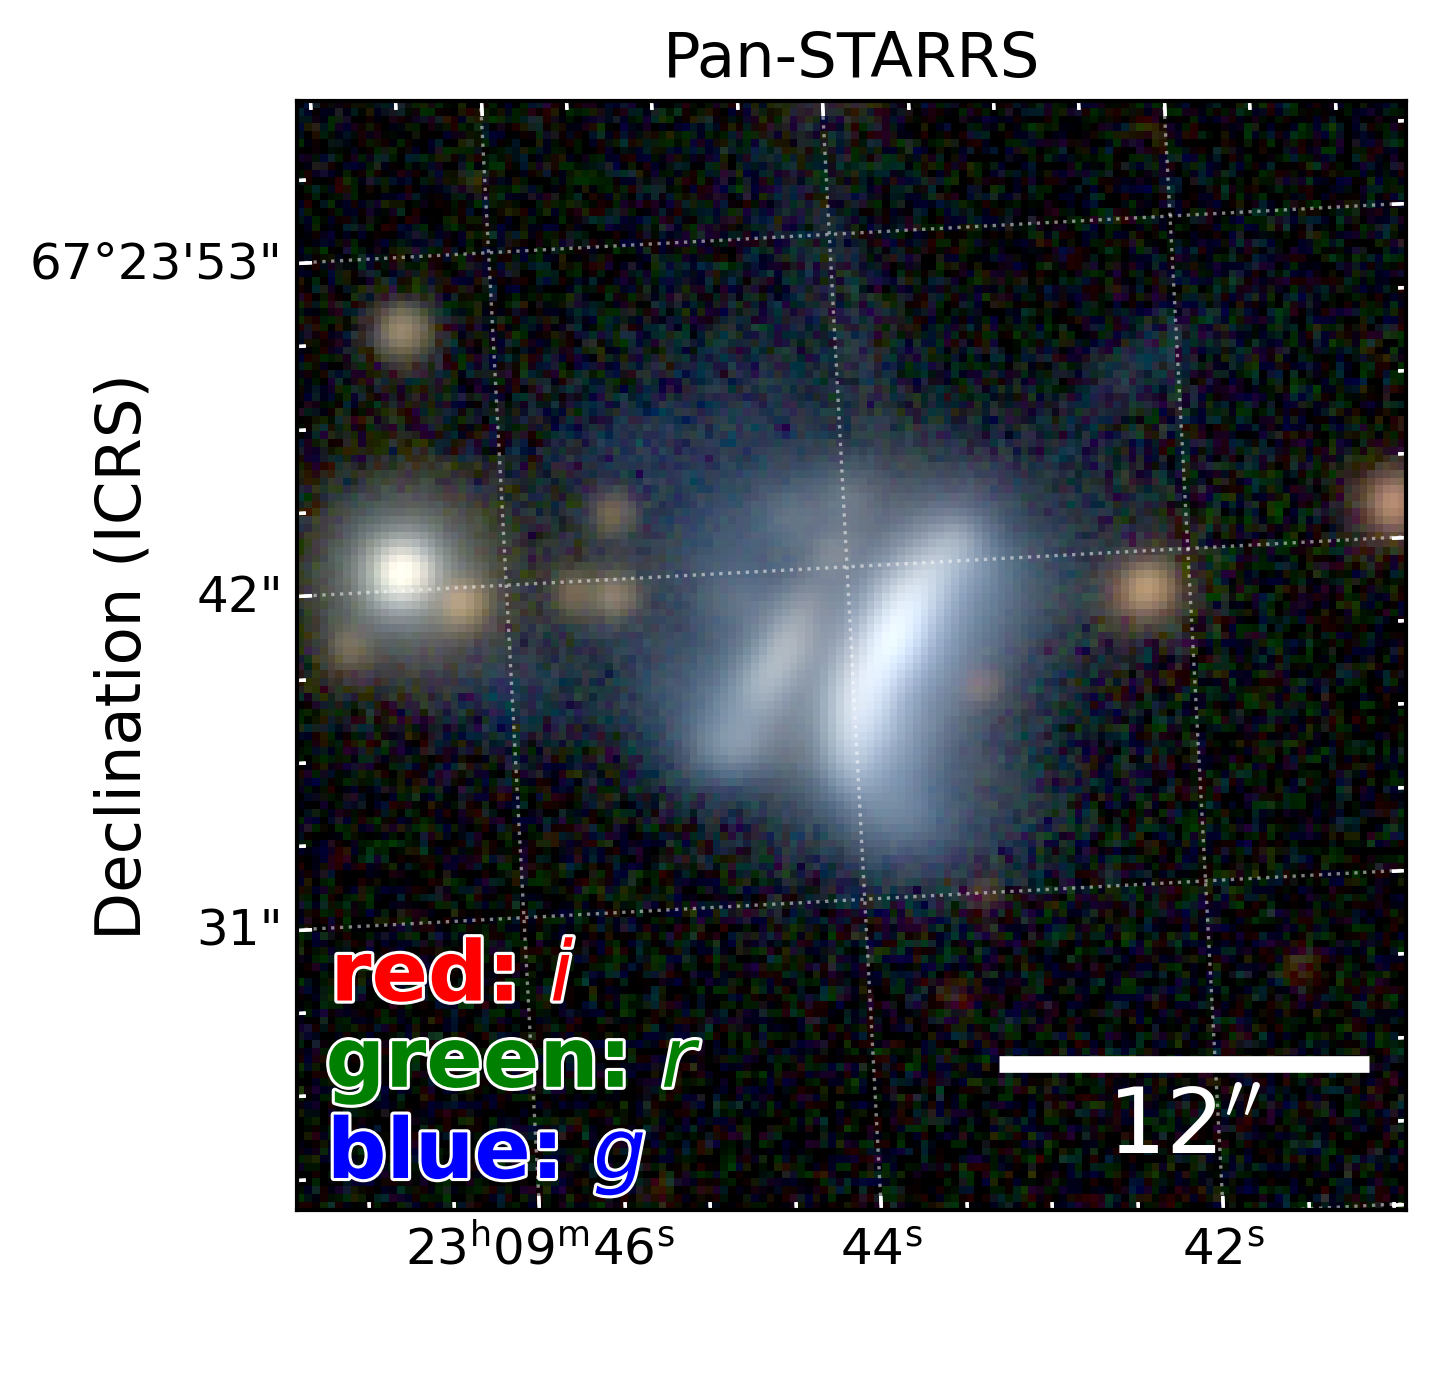

In [281]:
fig = plt.figure(dpi=300)

aplpy.make_rgb_image('DraChi_RGB_cube.fits','DraChi_rgb.png', 
                     stretch_r='log', stretch_g='log', stretch_b='log',
                     vmin_r=0., vmin_g=0., vmin_b=0.,
                     vmax_r=2e5, vmax_g=1e5, vmax_b=5e4)

f = aplpy.FITSFigure('DraChi_rgb.png', figure=fig)
f.show_rgb()

f.axis_labels.set_font(size=15)
f.axis_labels.set_xtext(' ')#('Right Ascension (ICRS)')
f.axis_labels.set_ytext('Declination (ICRS)')
f.axis_labels.set_ypad(pad=-1.5)


f.tick_labels.set_font(size=12)
#f.tick_labels.set_xformat('d.dd')
#f.tick_labels.set_yformat('d.ddd')

ang_sep = (12*u.arcsec).to(u.rad)
f.add_scalebar(ang_sep)
f.scalebar.set_label("$12''$")
f.scalebar.set_font(size=22)
f.scalebar.set_linewidth(4)
f.scalebar.set_color('white')

f.ticks.set_color('white')
f.ticks.set_tick_direction('in')
f.ticks.set_minor_frequency(4)
f.ticks.set_xspacing(0.008)  # degrees
f.ticks.set_yspacing(0.003)  # degrees

f.add_label(0.14,0.21, 'red: $i$', relative=True, color='red', size=20, weight='semibold', path_effects=[pe.withStroke(linewidth=1.5, foreground="white")])
f.add_label(0.195,0.13, 'green: $r$', relative=True, color='green', size=20, weight='semibold', path_effects=[pe.withStroke(linewidth=1.5, foreground="white")])
f.add_label(0.17,0.05, 'blue: $g$', relative=True, color='blue', size=20, weight='semibold', path_effects=[pe.withStroke(linewidth=1.5, foreground="white")])

f.add_grid()
f.grid.set_color('white')
f.grid.set_alpha(0.5)
f.grid.set_linestyle(':')

# got the coordinates of the center from CASAviewer
f.recenter(347.432, 67.3942, width=0.01, height=0.01)

f.set_title('Pan-STARRS', size=15)

fig.savefig('../plots/paper_plots/DraChi_irg_recentered.pdf', bbox_inches='tight')



INFO: Red: [aplpy.rgb]
INFO: vmin =  0.000e+00 [aplpy.rgb]
INFO: vmax =  2.000e+05 [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin =  0.000e+00 [aplpy.rgb]
INFO: vmax =  1.000e+05 [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin =  0.000e+00 [aplpy.rgb]
INFO: vmax =  5.000e+04 [aplpy.rgb]
b'<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?>\n<x:xmpmeta xmlns:avm="http://www.communicatingastronomy.org/avm/1.0/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:x="adobe:ns:meta/"><rdf:RDF><rdf:Description><avm:MetadataVersion>1.1000000000000001</avm:MetadataVersion><avm:Spatial.CoordinateFrame>ICRS</avm:Spatial.CoordinateFrame><avm:Spatial.Equinox>nan</avm:Spatial.Equinox><avm:Spatial.ReferenceValue><rdf:Bag><rdf:li>350.7692083690000118</rdf:li><rdf:li>65.9999966182350022</rdf:li></rdf:Bag></avm:Spatial.ReferenceValue><avm:Spatial.ReferenceDimension><rdf:Bag><rdf:li>160.0000000000000000</rdf:li><rdf:li>160.0000000000000000</rdf:li></rdf:Bag></avm:Spatial.ReferenceDi

Set OBSGEO-B to    19.947177 from OBSGEO-[XYZ].
Set OBSGEO-H to     6578.484 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    19.947177 from OBSGEO-[XYZ].
Set OBSGEO-H to     6578.484 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


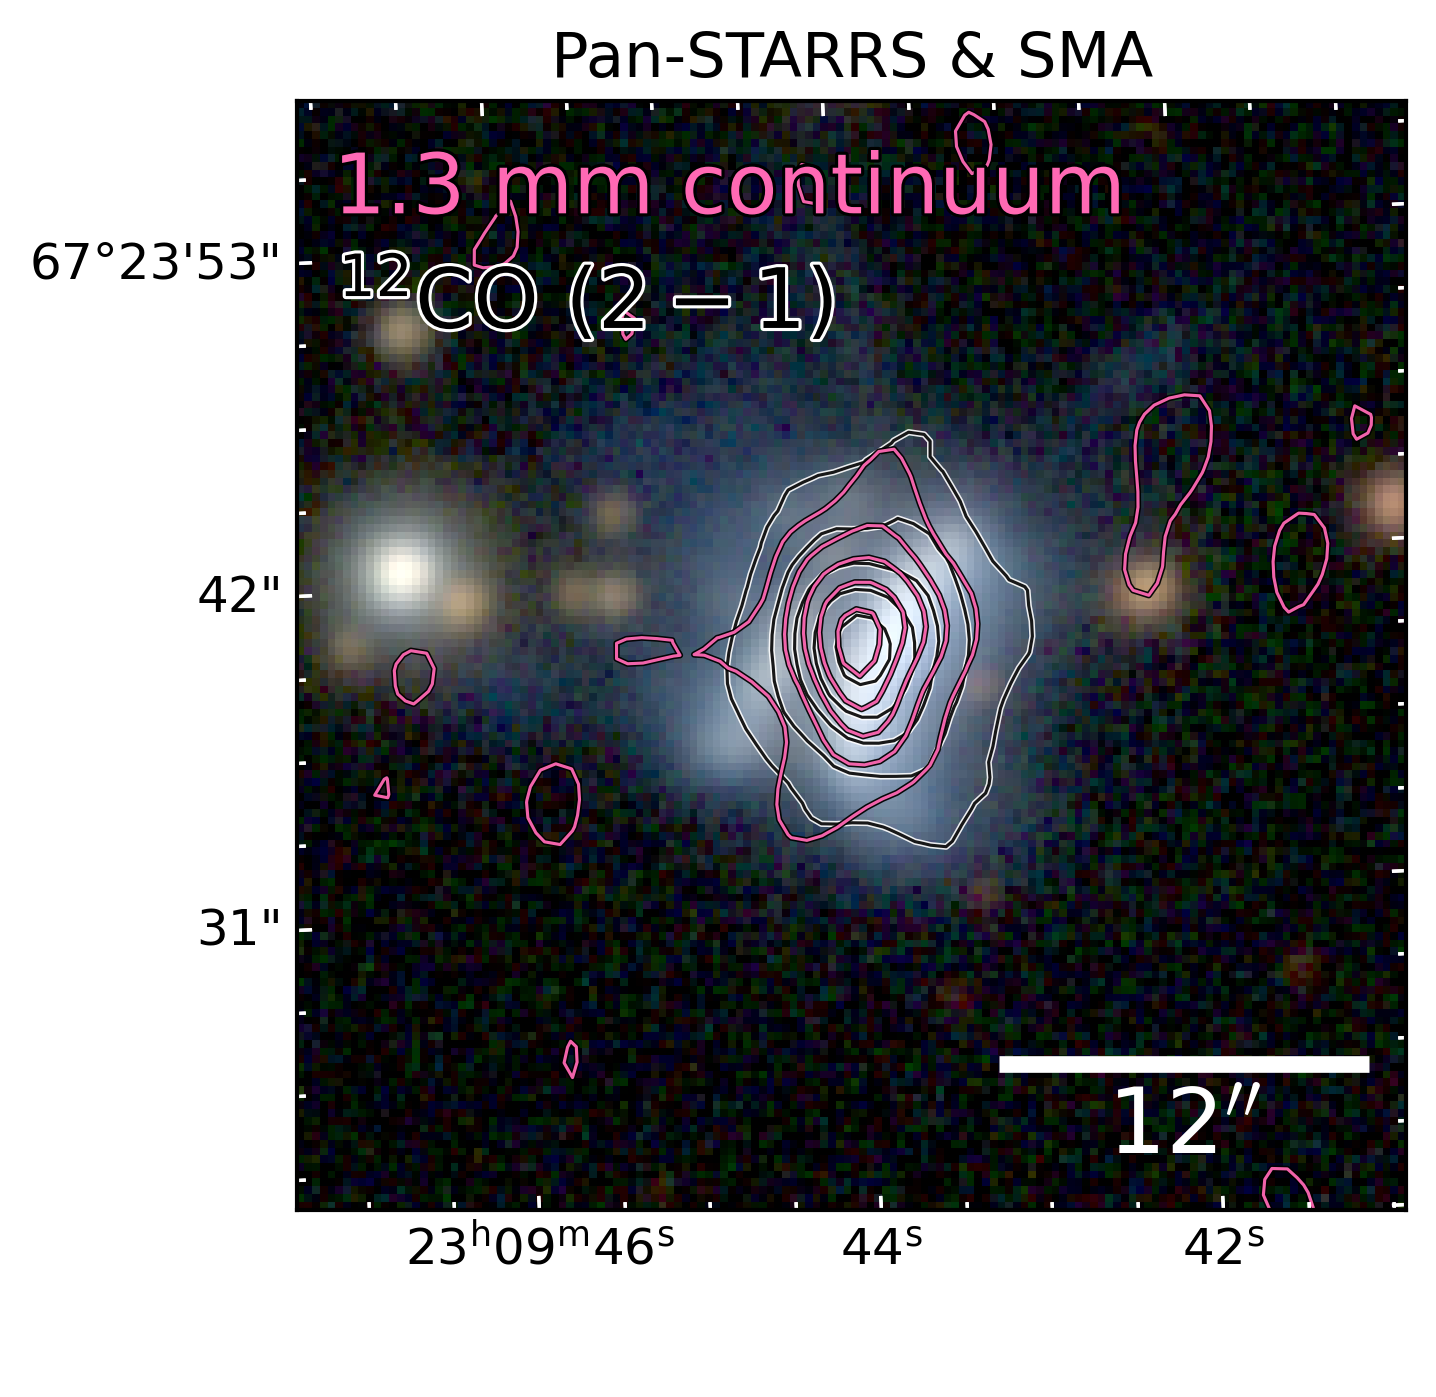

In [385]:
fig = plt.figure(dpi=300)

aplpy.make_rgb_image('DraChi_RGB_cube.fits','DraChi_rgb.png', 
                     stretch_r='log', stretch_g='log', stretch_b='log',
                     vmin_r=0., vmin_g=0., vmin_b=0.,
                     vmax_r=2e5, vmax_g=1e5, vmax_b=5e4)

f = aplpy.FITSFigure('DraChi_rgb.png', figure=fig)
f.show_rgb()

f.axis_labels.set_font(size=15)
f.axis_labels.set_xtext(' ')#('Right Ascension (ICRS)')
f.axis_labels.set_ytext(' ')
f.axis_labels.set_ypad(pad=-1.5)


f.tick_labels.set_font(size=12)
#f.tick_labels.set_xformat('d.dd')
#f.tick_labels.set_yformat('d.ddd')

ang_sep = (12*u.arcsec).to(u.rad)
f.add_scalebar(ang_sep)
f.scalebar.set_label("$12''$")
f.scalebar.set_font(size=22)
f.scalebar.set_linewidth(4)
f.scalebar.set_color('white')

f.ticks.set_color('white')
f.ticks.set_tick_direction('in')
f.ticks.set_minor_frequency(4)
f.ticks.set_xspacing(0.008)  # degrees
f.ticks.set_yspacing(0.003)  # degrees

#f.add_label(0.095,0.15, 'red: $i$', relative=True, color='red', size=12, weight='semibold', path_effects=[pe.withStroke(linewidth=1.5, foreground="white")])
#f.add_label(0.13,0.10, 'green: $r$', relative=True, color='green', size=12, weight='semibold', path_effects=[pe.withStroke(linewidth=1.5, foreground="white")])
#f.add_label(0.115,0.05, 'blue: $g$', relative=True, color='blue', size=12, weight='semibold', path_effects=[pe.withStroke(linewidth=1.5, foreground="white")])

#f.add_grid()
#f.grid.set_color('white')
#f.grid.set_alpha(0.5)
#f.grid.set_linestyle(':')

# got the coordinates of the center from CASAviewer
f.recenter(347.432, 67.3942, width=0.01, height=0.01)


### 12CO contours
max_em = 1.05e4 # mJy/beam m/s from mom0 map
c_levs = np.arange(0.1,1.2,0.2)*max_em
f.show_contour(mom0_12CO, colors='white', linewidths=1.5, levels=c_levs, alpha=0.9)
f.show_contour(mom0_12CO, colors='black', linewidths=0.75, levels=c_levs, alpha=0.9)
f.add_label(0.26,0.82, '$^{12}$CO $(2-1)$', relative=True, color='black', size=20, path_effects=[pe.withStroke(linewidth=1.5, foreground="white")])


### continuum contours
max_em = 0.016 # Jy/beam from CASA
c_levs = np.arange(0.1,1.2,0.2)*max_em
f.show_contour(cont, colors='black', linewidths=1.5, levels=c_levs, alpha=0.95)
f.show_contour(cont, colors='hotpink', linewidths=0.75, levels=c_levs, alpha=0.95)
f.add_label(0.39,0.92, '1.3 mm continuum', relative=True, color='hotpink', size=20, path_effects=[pe.withStroke(linewidth=1.5, foreground="black")])

f.set_title('Pan-STARRS & SMA', size=15)

fig.savefig('../plots/paper_plots/DraChi_irg_recentered_contours_12CO_cont.pdf', bbox_inches='tight')



In [246]:
def figure_layout( fig, c_unit, fontcolor='white', colorbar=True):
    fig.set_nan_color('0.95')
    
    # beam 
    fig.add_beam()
    fig.beam.set(facecolor='white', edgecolor='black', hatch='////////')
    
    # 
    fig.axis_labels.set_font(size=15)
    fig.axis_labels.set_xtext('Right Ascension (ICRS)')
    fig.axis_labels.set_ytext('Declination (ICRS)')
    fig.axis_labels.set_ypad(pad=-1.5)
    #fig.tick_labels.set_yformat('d.ddd')
    #fig.tick_labels.set_xformat('d.ddd')

    ## Scale bar
    ang_sep = (12*u.arcsec).to(u.rad)
    fig.add_scalebar(ang_sep)
    fig.scalebar.set_label("$12''$")
    fig.scalebar.set_font(size=22)
    fig.scalebar.set_linewidth(3) 
    fig.scalebar.set_color(fontcolor)
    
    if colorbar:
        fig.add_colorbar()
        fig.colorbar.set_location('right')
        fig.colorbar.set_width(0.1)
        fig.colorbar.set_pad(0.05)
        fig.colorbar.set_axis_label_text(c_unit)
        fig.colorbar.set_label_properties(size=10)
    
    # Ticks
    fig.ticks.set_color(fontcolor)
    fig.ticks.set_tick_direction('in')
    fig.ticks.set_minor_frequency(4)
    fig.ticks.set_xspacing(0.008)  # degrees
    fig.ticks.set_yspacing(0.003)  # degrees
    fig.tick_labels.set_font(size=12)
    
    # got the coordinates of the center from CASAviewer
    fig.recenter(347.432,67.3942,width=0.01,height=0.01)
    

INFO: Setting slices=[0, 0] [aplpy.core]


Set OBSGEO-B to    19.947177 from OBSGEO-[XYZ].
Set OBSGEO-H to     6578.484 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


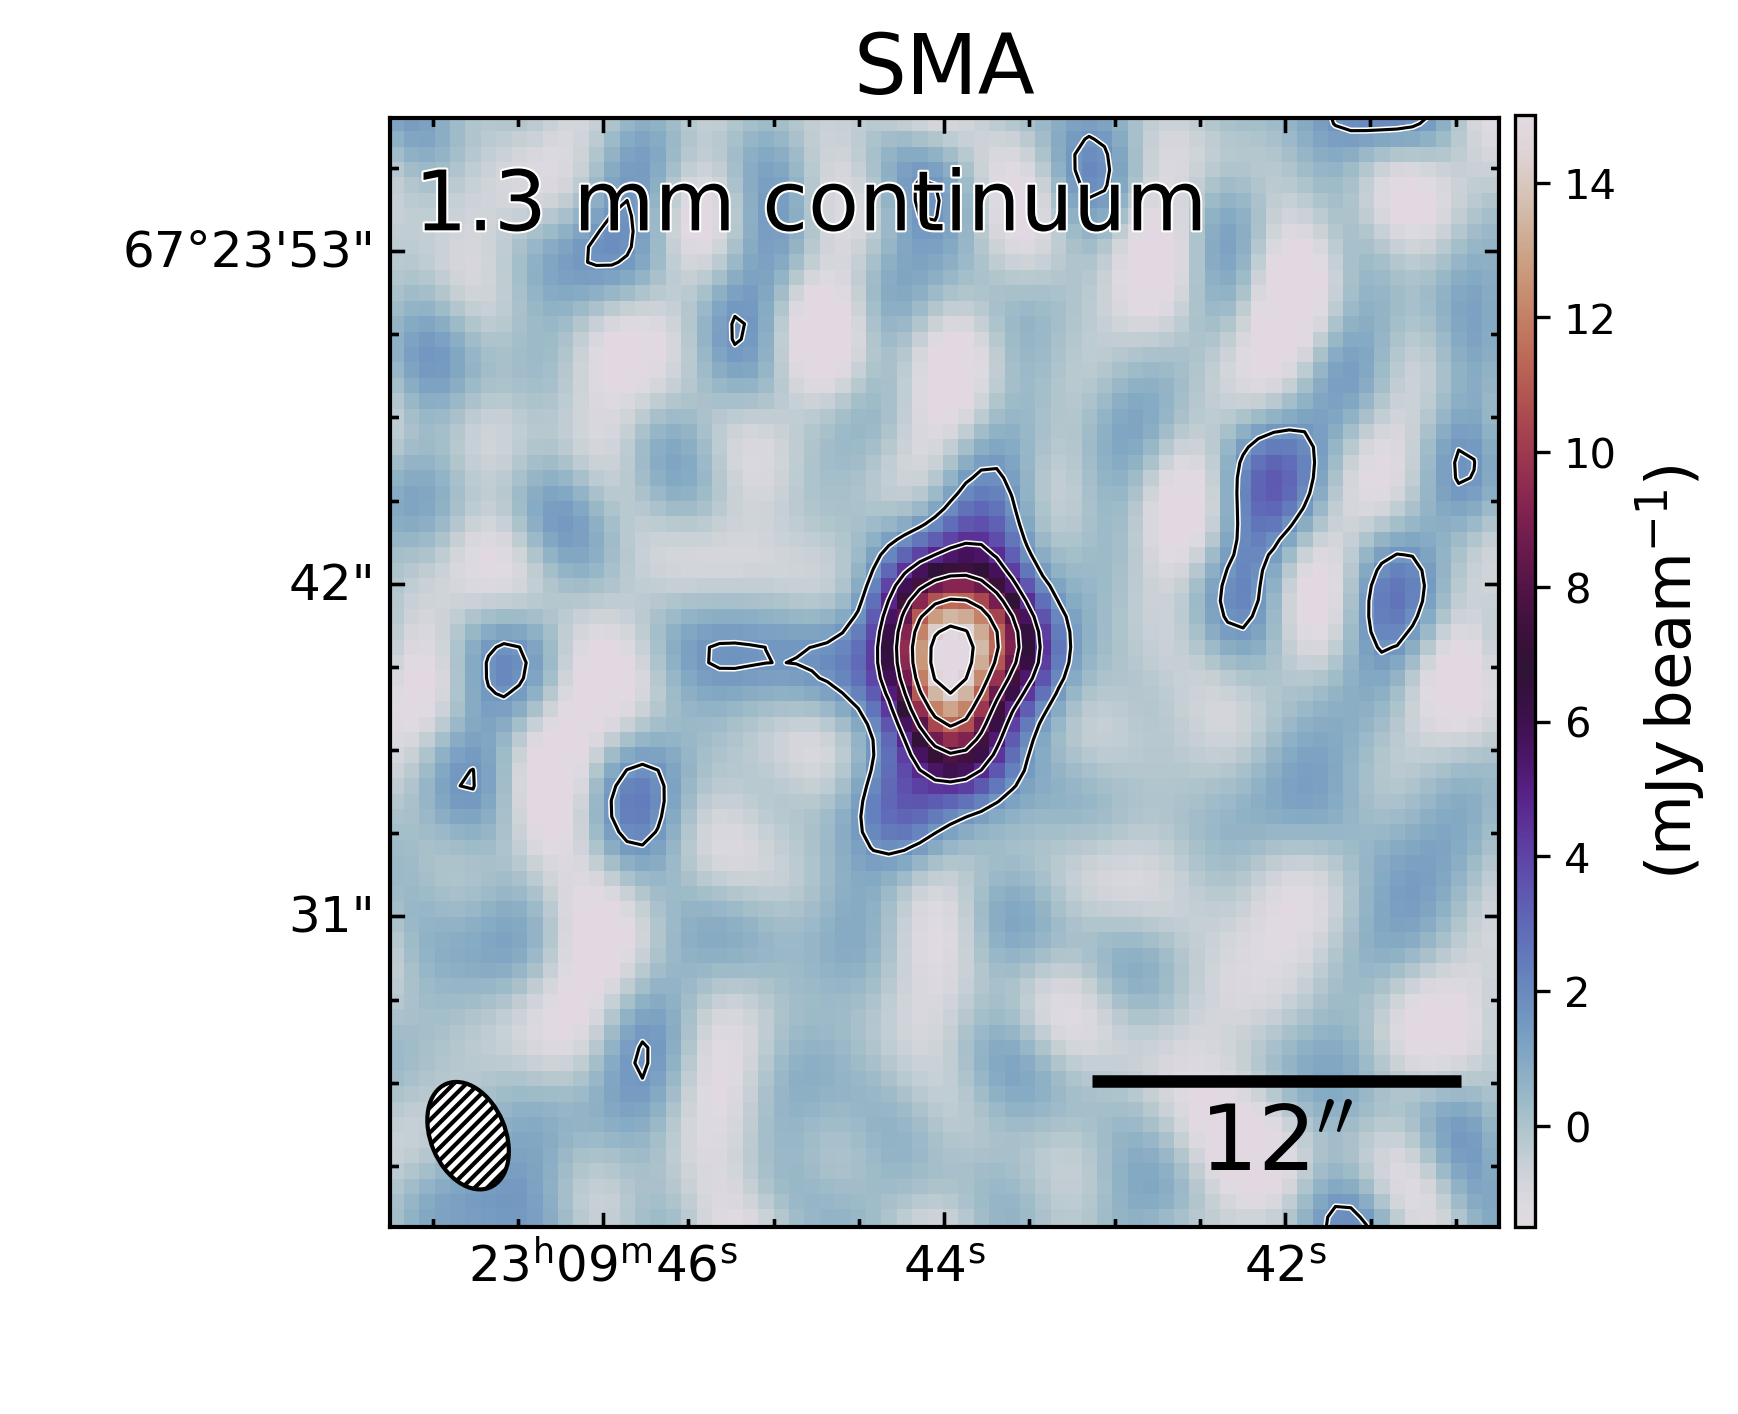

In [395]:
color_table='twilight'#cc.cm.fire
fig = plt.figure(dpi=300)

f_cont = aplpy.FITSFigure(cont_original, figure=fig, dimensions=[0,1], slices=[1])
fix_aplpy_fits(f_cont)

f_cont.show_colorscale(cmap=color_table, vmin=-0.0015, vmax=0.015)#, vmin=vmin, vmax=vmax) 

max_em = 0.016 # Jy/beam from CASA
c_levs = np.arange(0.1,1.2,0.2)*max_em

# adopt the default layout
figure_layout( f_cont, c_unit='', colorbar=False, fontcolor='black')

f_cont.show_contour(colors='white', linewidths=1.5, levels=c_levs)
f_cont.show_contour(colors='black', linewidths=0.75, levels=c_levs)

f_cont.add_label(0.38,0.92, '1.3 mm continuum', relative=True, color='black', size=20, path_effects=[pe.withStroke(linewidth=1., foreground="white")])

f_cont.axis_labels.set_xtext(' ')
f_cont.axis_labels.set_ytext(' ')

f_cont.set_title('SMA', size=20)

im = plt.imshow(cont[0].data[0][0]*1000, cmap=color_table, vmin=-0.0015*1000, vmax=0.015*1000)
cb_ax = fig.add_axes([0.81, 0.11, 0.01, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('($\mathrm{mJy\,beam^{-1}}$)', fontsize=15)

fig.savefig('../plots/paper_plots/DraChi_cont_withcontours.pdf', bbox_inches='tight')

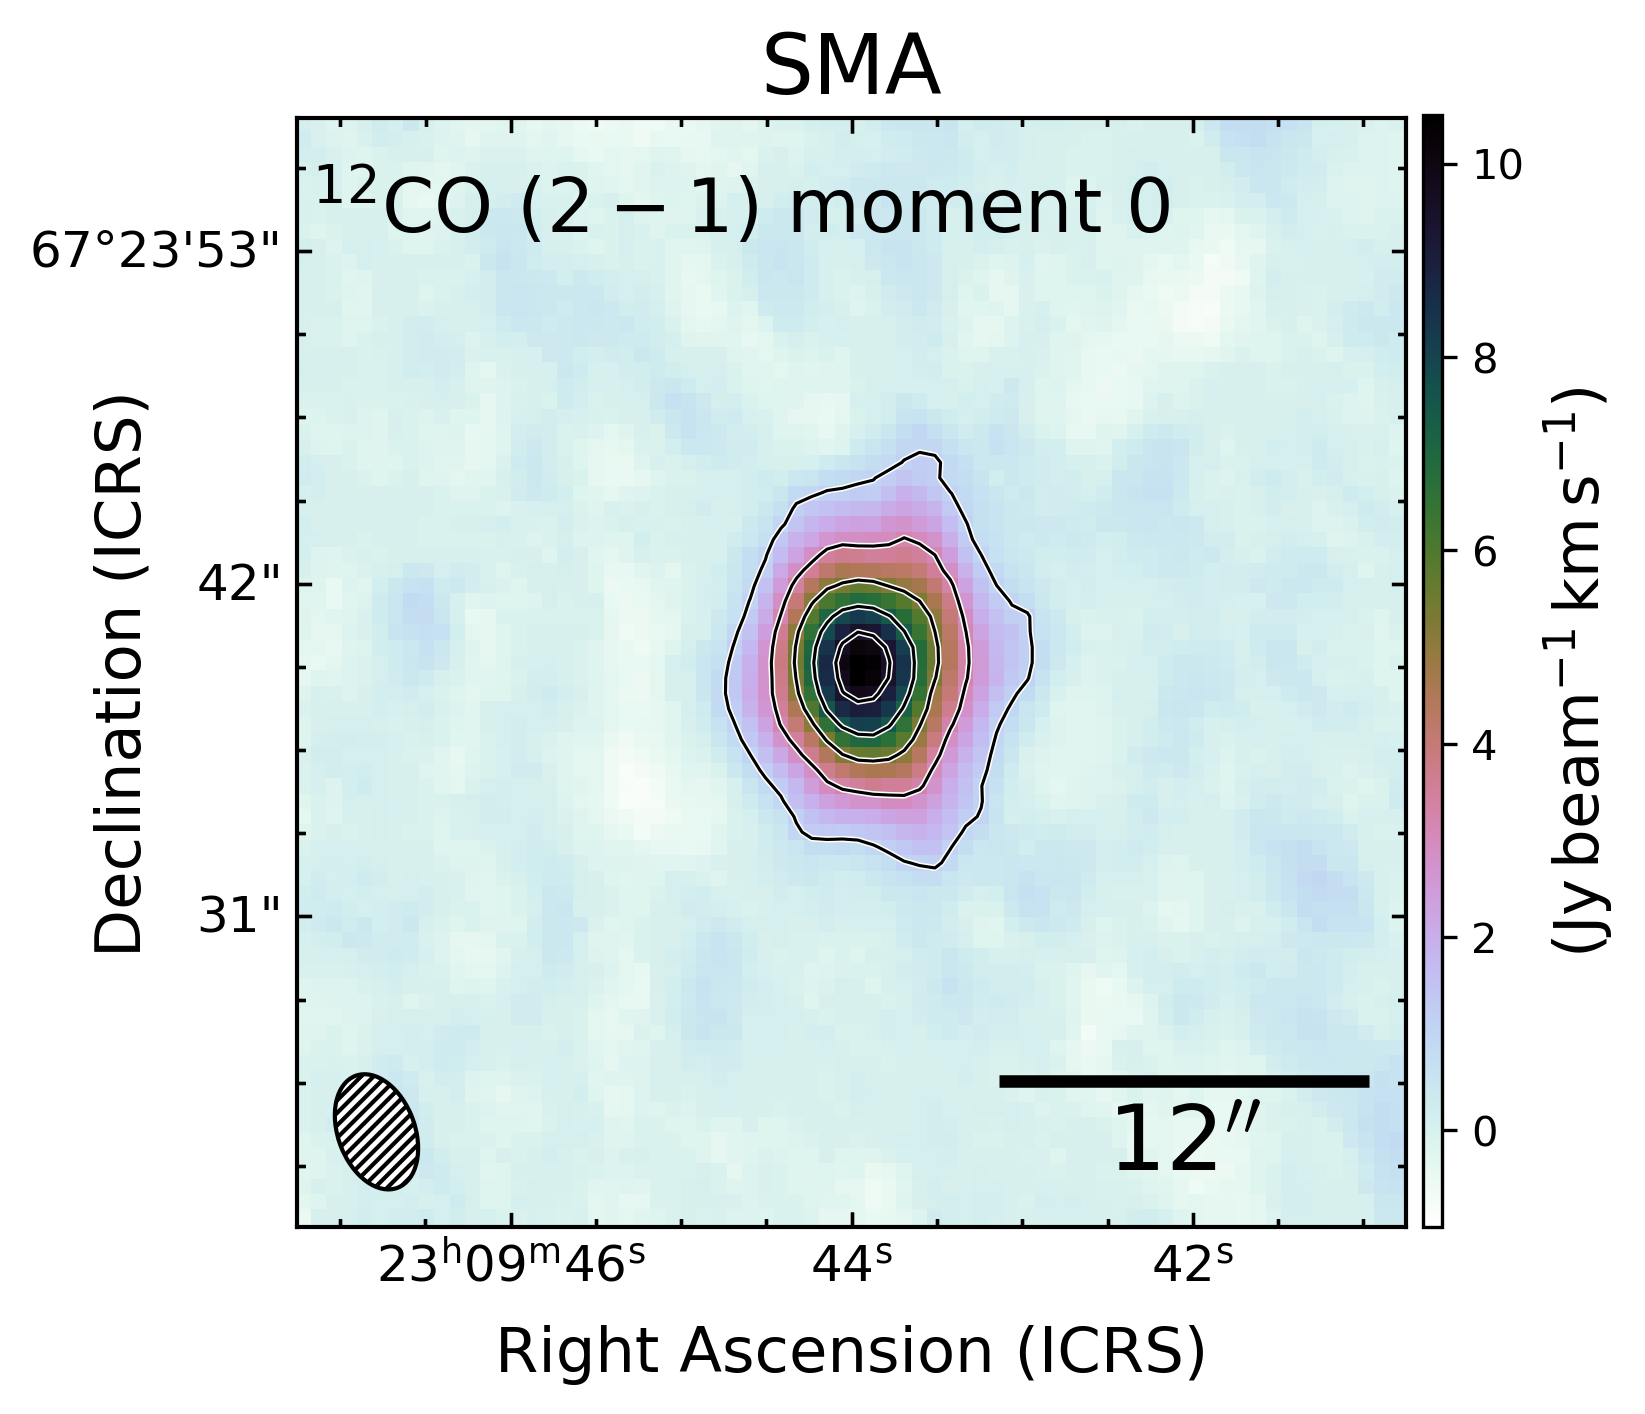

In [390]:
color_table='cubehelix_r'#cc.cm.fire
fig = plt.figure(dpi=300)

f_12CO = aplpy.FITSFigure(mom0_12CO, figure=fig, dimensions=[0,1], slices=[1])

f_12CO.show_colorscale(cmap=color_table, vmin=-1000, vmax=10500)#, vmin=vmin, vmax=vmax) 

max_em = 1.05e4 # Jy/beam m/s from mom0 map
c_levs = np.arange(0.1,1.2,0.2)*max_em

# adopt the default layout
figure_layout( f_12CO, c_unit='', colorbar=False, fontcolor='black')

f_12CO.show_contour(colors='white', linewidths=1.5, levels=c_levs)
f_12CO.show_contour(colors='black', linewidths=0.75, levels=c_levs)

f_12CO.add_label(0.40,0.92, '$^{12}$CO $(2-1)$ moment 0', relative=True, color='black', size=18)#, path_effects=[pe.withStroke(linewidth=1.5, foreground="white")])

#f_12CO.axis_labels.set_xtext(' ')
#f_12CO.axis_labels.set_ytext(' ')

f_12CO.set_title('SMA', size=20)

im = plt.imshow(mom0_12CO[0].data/1000, cmap=color_table, vmin=-1000/1000, vmax=10500/1000)
cb_ax = fig.add_axes([0.81, 0.11, 0.01, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$(\mathrm{Jy\,beam^{-1}\,km\,s^{-1}})$', fontsize=15, color='black')


fig.savefig('../plots/paper_plots/DraChi_12CO_withcontours.pdf', bbox_inches='tight')

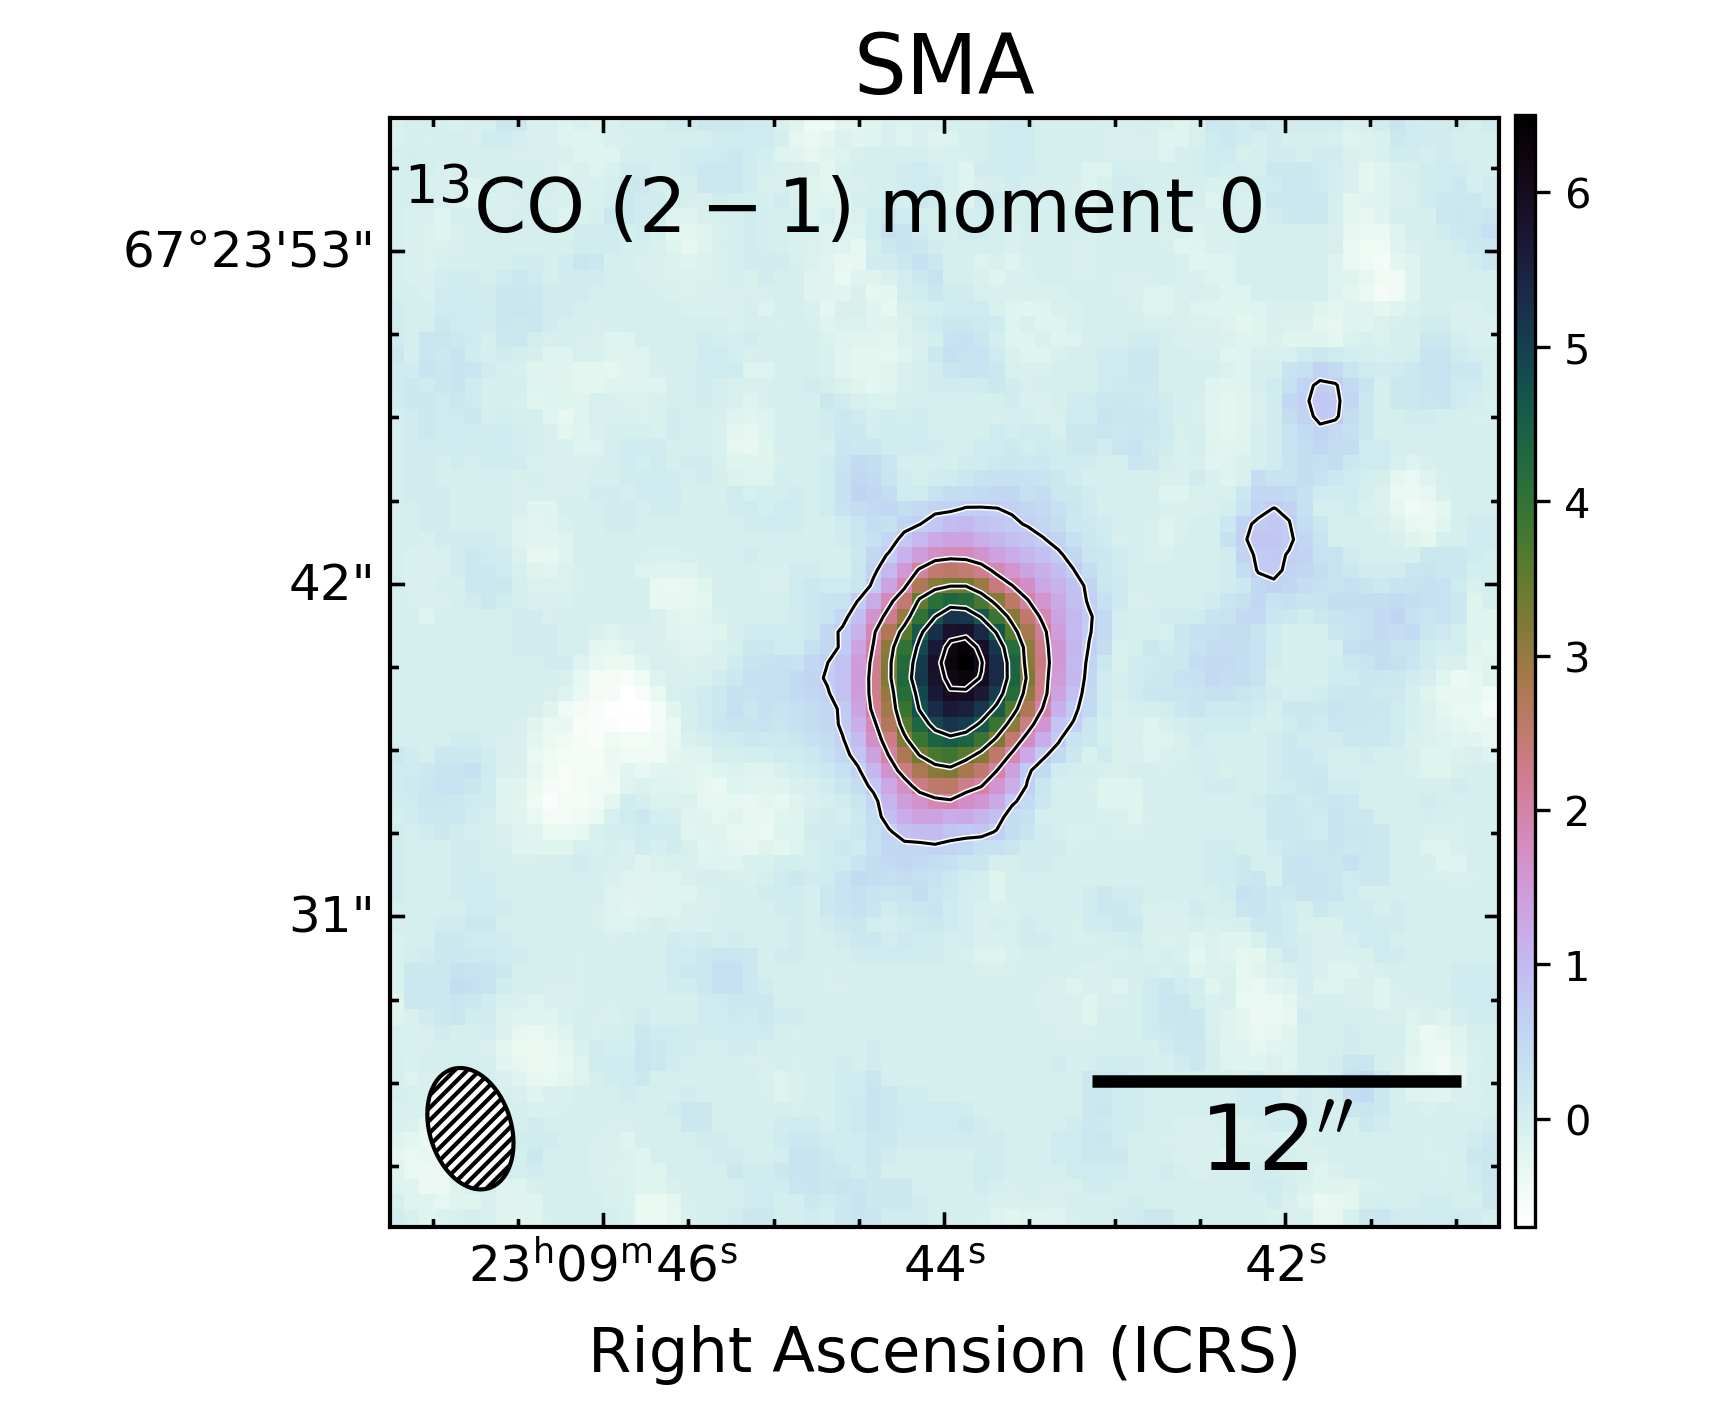

In [391]:
color_table='cubehelix_r'#cc.cm.fire
fig = plt.figure(dpi=300)

f_13CO = aplpy.FITSFigure(mom0_13CO, figure=fig, dimensions=[0,1], slices=[1])

f_13CO.show_colorscale(cmap=color_table, vmin=-700, vmax=6500)#, vmax=10500)#, vmin=vmin, vmax=vmax) 

max_em = 6.7e3 # mJy/beam m/s from mom0 map
c_levs = np.arange(0.1,1.2,0.2)*max_em

# adopt the default layout
figure_layout( f_13CO, c_unit='', colorbar=False, fontcolor='black')

f_13CO.show_contour(colors='white', linewidths=1.5, levels=c_levs)
f_13CO.show_contour(colors='black', linewidths=0.75, levels=c_levs)

f_13CO.add_label(0.40,0.92, '$^{13}$CO $(2-1)$ moment 0', relative=True, color='black', size=18)#, path_effects=[pe.withStroke(linewidth=1.5, foreground="white")])

#f_13CO.axis_labels.set_xtext(' ')
f_13CO.axis_labels.set_ytext(' ')

f_13CO.set_title('SMA', size=20)

im = plt.imshow(mom0_13CO[0].data/1000, cmap=color_table, vmin=-700/1000, vmax=6500/1000)
cb_ax = fig.add_axes([0.81, 0.11, 0.01, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$(\mathrm{Jy\,beam^{-1}\,km\,s^{-1}})$', fontsize=15, color='white')


fig.savefig('../plots/paper_plots/DraChi_13CO_withcontours.pdf', bbox_inches='tight')

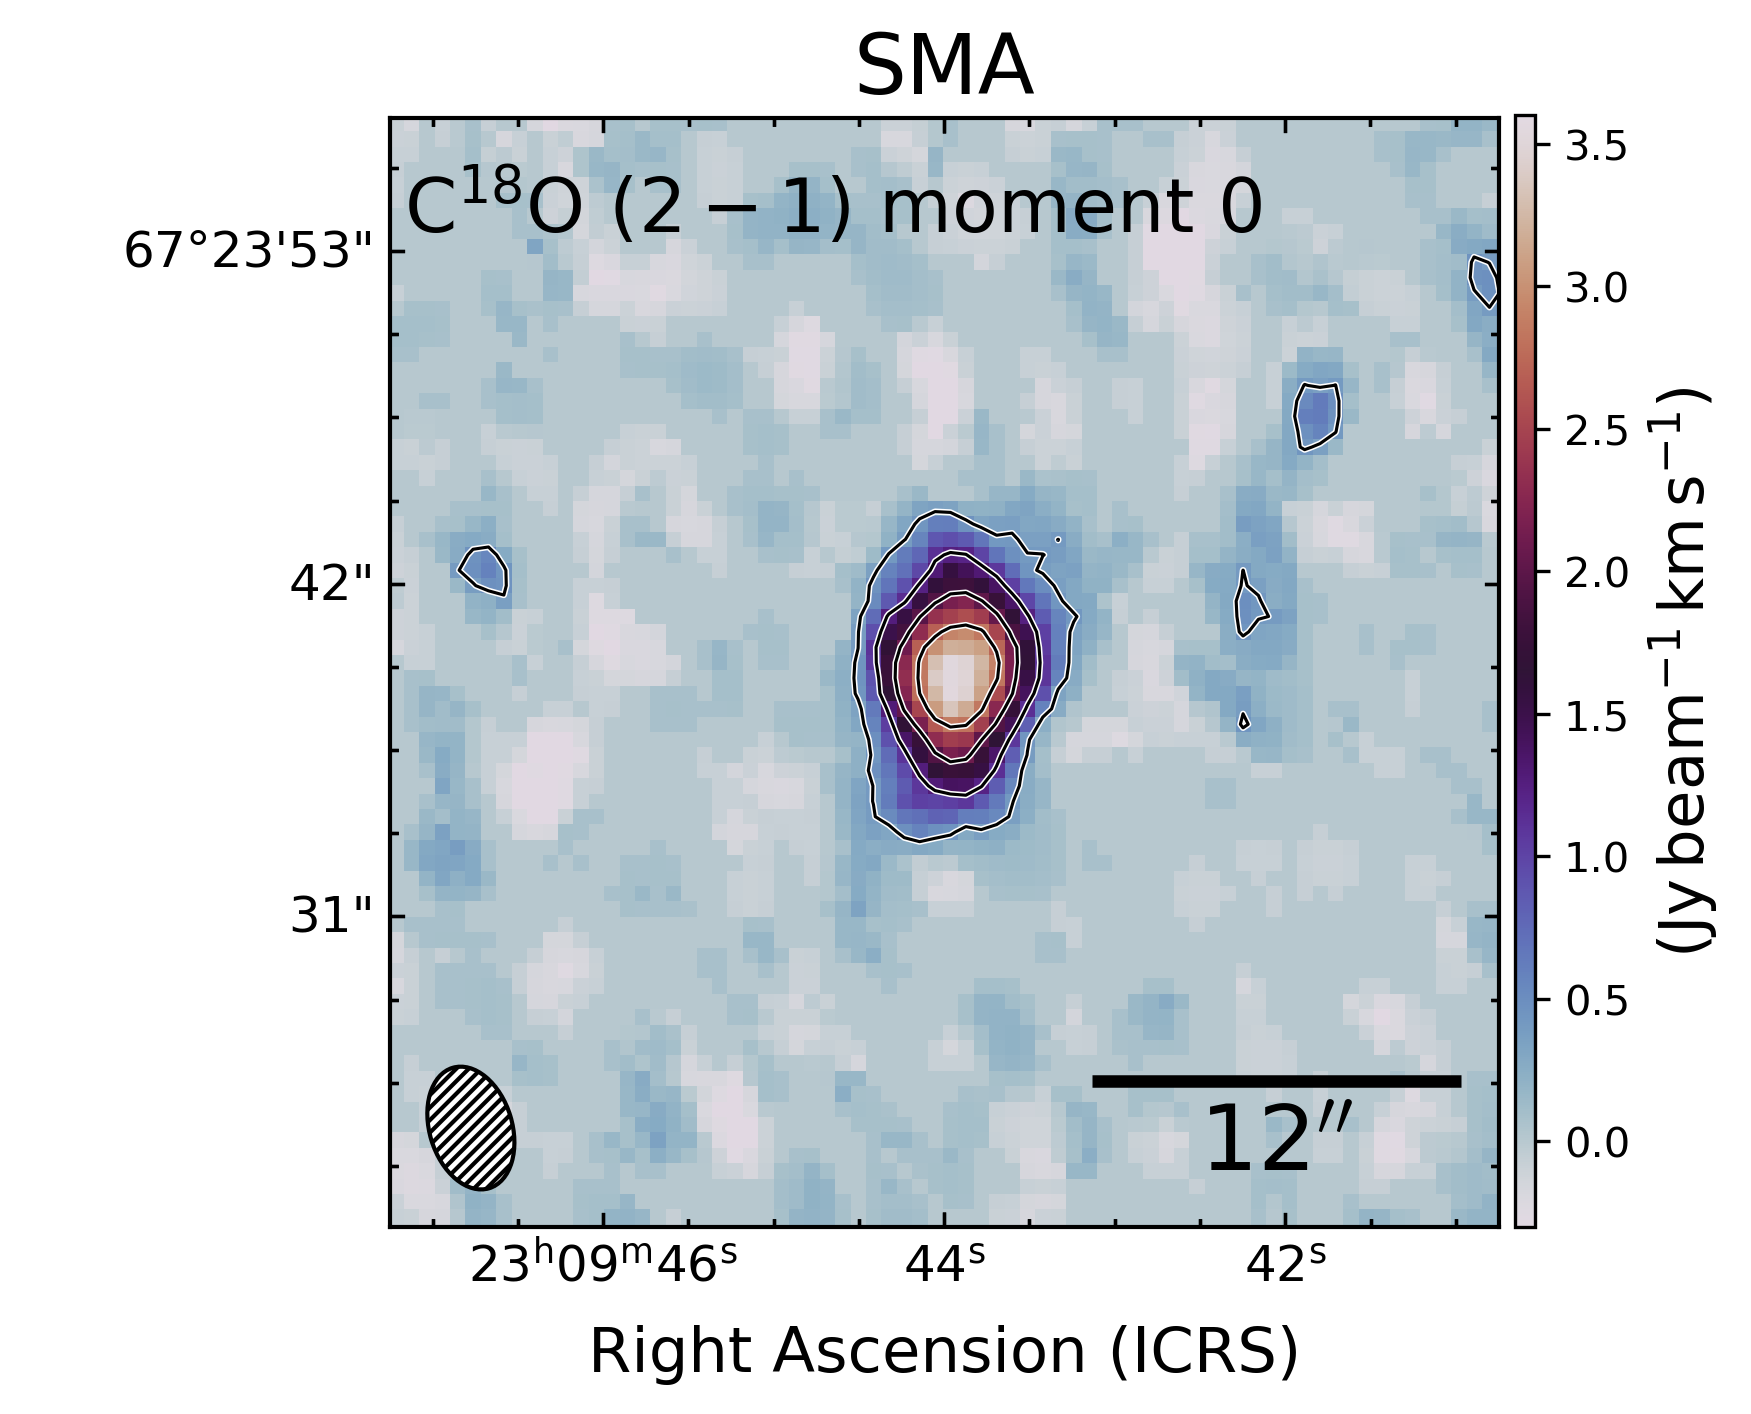

In [393]:
color_table='twilight'#cc.cm.fire
fig = plt.figure(dpi=300)

f_C18O = aplpy.FITSFigure(mom0_C18O, figure=fig, dimensions=[0,1], slices=[1])

f_C18O.show_colorscale(cmap=color_table, vmin=-300, vmax=3600)#, vmin=-700, vmax=6500)#, vmax=10500)#, vmin=vmin, vmax=vmax) 

max_em = 3.99e3 # mJy/beam m/s from mom0 map
c_levs = np.arange(0.1,1.2,0.2)*max_em

# adopt the default layout
figure_layout( f_C18O, c_unit='', colorbar=False, fontcolor='black')

f_C18O.show_contour(colors='white', linewidths=1.5, levels=c_levs)
f_C18O.show_contour(colors='black', linewidths=0.75, levels=c_levs)

f_C18O.add_label(0.40,0.92, 'C$^{18}$O $(2-1)$ moment 0', relative=True, color='black', size=18)#, path_effects=[pe.withStroke(linewidth=1.5, foreground="white")])

#f_C18O.axis_labels.set_xtext(' ')
f_C18O.axis_labels.set_ytext(' ')

f_C18O.set_title('SMA', size=20)

im = plt.imshow(mom0_C18O[0].data/1000, cmap=color_table, vmin=-300/1000, vmax=3600/1000)
cb_ax = fig.add_axes([0.81, 0.11, 0.01, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$(\mathrm{Jy\,beam^{-1}\,km\,s^{-1}})$', fontsize=15)

fig.savefig('../plots/paper_plots/DraChi_C18O_withcontours.pdf', bbox_inches='tight')

### Fig 2

In [ ]:
#